In [1]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import rand_score, silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
embeddings = np.load("../data/desc_embeddings.npy")

In [3]:
embeddings.shape

(3957, 768)

In [4]:
kmeans = KMeans(n_clusters=8).fit(embeddings)
kmeans.labels_

array([0, 4, 4, ..., 7, 3, 6], dtype=int32)

In [5]:
agglo = AgglomerativeClustering(n_clusters=8).fit(embeddings)
agglo.labels_

array([1, 0, 0, ..., 3, 4, 2])

In [6]:
rand_score(kmeans.labels_, agglo.labels_)

0.7999846939023215

In [7]:
# Change distance measure
kmeans_scores = []
agglo_scores = []
for k in tqdm(range(2, 20)):
    # kmeans = KMeans(n_clusters=k).fit(embeddings)
    agglo = AgglomerativeClustering(n_clusters=k, affinity="cosine", linkage="average").fit(embeddings)
    
    # kmeans_scores.append(silhouette_score(embeddings, kmeans.labels_))
    agglo_scores.append(silhouette_score(embeddings, agglo.labels_, metric="cosine"))

100%|███████████████████████████████████████████| 18/18 [01:02<00:00,  3.46s/it]


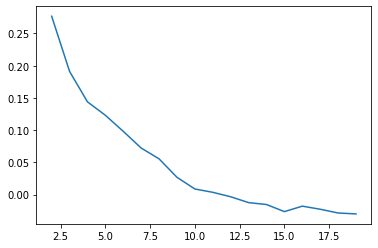

In [8]:
plt.plot(range(2, 20), agglo_scores)
plt.show()